In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


[*********************100%***********************]  10 of 10 completed


array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'AMZN'}>,
        <AxesSubplot:title={'center':'BRK'}>],
       [<AxesSubplot:title={'center':'FB'}>,
        <AxesSubplot:title={'center':'GOOGL'}>,
        <AxesSubplot:title={'center':'MSFT'}>],
       [<AxesSubplot:title={'center':'NVDA'}>,
        <AxesSubplot:title={'center':'TCEHY'}>,
        <AxesSubplot:title={'center':'TSLA'}>],
       [<AxesSubplot:title={'center':'TSM'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

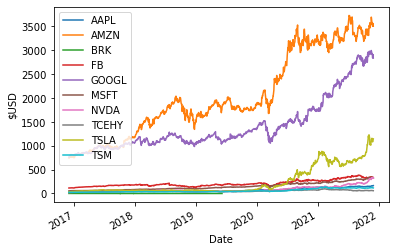

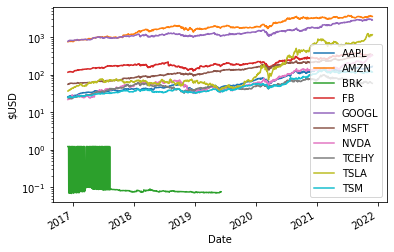

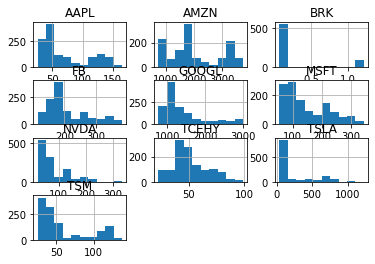

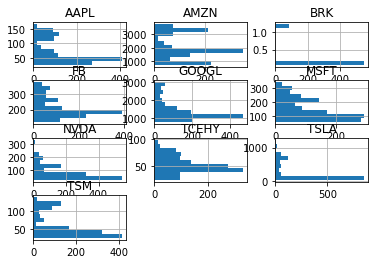

In [11]:
import pandas as pd
import yfinance as yf
import numpy as np

tks= yf.Tickers(['MSFT', 'AAPL', 'Googl', 'TCEHY', 'AMZN', 'TSLA', 'FB', 'NVDA', 'BRK','TSM'])
tks
# 撈5年的資料
tkPrice= tks.history(period='5Y')


tkPrice.Close.plot(ylabel='$USD')
tkPrice.Close.plot(logy= True, ylabel='$USD')


tkPrice.Close.hist()
tkPrice.Close.hist(orientation= 'horizontal')

<AxesSubplot:title={'center':'Market Capital (in $TrillionUSD)'}, xlabel='Date', ylabel='$TrillionUSD'>

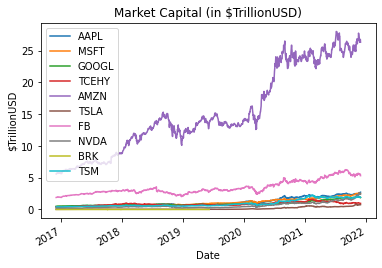

In [12]:
#AAPL:  Shares Outstanding	16.41B
#MSFT:  Shares Outstanding	7.51B
#GOOGL&GOOG: Implied Shares Outstanding 663.76M

# 公司總市值，$TrillionUSD
X0= tkPrice.Close.AAPL.apply(lambda x:  x*16.41/1e3) 
X1= tkPrice.Close.MSFT.apply(lambda x:  x*7.51/1e3)
X2= tkPrice.Close.GOOGL.apply(lambda x: x*.66376/1e3)
X3= tkPrice.Close.TCEHY.apply(lambda x:  x*16.41/1e3) 
X4= tkPrice.Close.AMZN.apply(lambda x:  x*7.51/1e3)
X5= tkPrice.Close.TSLA.apply(lambda x: x*.66376/1e3)
X6= tkPrice.Close.FB.apply(lambda x:  x*16.41/1e3) 
X7= tkPrice.Close.NVDA.apply(lambda x:  x*7.51/1e3)
X8= tkPrice.Close.BRK.apply(lambda x: x*.66376/1e3)
X9= tkPrice.Close.TSM.apply(lambda x:  x*16.41/1e3) 
X= pd.DataFrame([X0,X1,X2,X3,X4,X5,X6,X7,X8,X9])
X= X.T
X.plot(ylabel='$TrillionUSD', 
       #logy= True, 
       title='Market Capital (in $TrillionUSD)')

In [27]:
top10= {
    'MSFT':    'Microsoft',
    'AAPL':    'Apple',
    #'2222.SR': 'Saudi Aramco',
    'GOOG':    'Alphabet (Google)',
    'AMZN':    'Amazon',
    'TSLA':    'Tesla',
    'FB':      'Meta (Facebook)',
    'NVDA':    'NVIDIA',
    'BRK-A':   'Berkshire Hathaway',
    'TSM':     'TSMC',
    'TCEHY':   'Tencent',
    #'JPM':     'JPMorgan Chase'
    }


In [28]:
top10L= list(top10.keys())
top10L

['MSFT', 'AAPL', 'GOOG', 'AMZN', 'TSLA', 'FB', 'NVDA', 'BRK-A', 'TSM', 'TCEHY']

[*********************100%***********************]  10 of 10 completed


<AxesSubplot:xlabel='Date'>

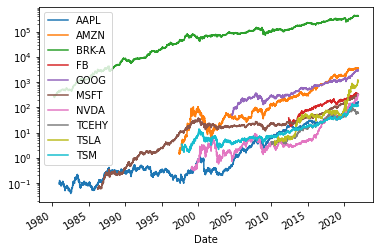

In [29]:
tks= yf.Tickers(top10L)
X= tks.history(period='max')
X.Close.plot(logy=True)

In [30]:
top10Stocks= [
    (2.52E+03,  336.06),
    (2.49E+03,  151.28),
    #(2.02E+03, 10.09), 
    (1.95E+03,  2985), 
    (1.78E+03,  3519), 
    (1.23E+03,  1222), 
    (936.98	,   341.13), 
    (741.41	,   297.52), 
    (655.23	,   434000), 
    (610.91	,   117.80), 
    (562.82	,   58.59), 
    #(503.24,   168.05), 
    ]

#top10Stocks= np.array(top10Stocks)[:,-1]*1e-3 # unit= Trillion
#top10Stocks

top10Stocks= np.array(top10Stocks)[:,0]/ np.array(top10Stocks)[:,1]/1e3 # unit= Trillion
top10Stocks

array([7.49866095e-03, 1.64595452e-02, 6.53266332e-04, 5.05825519e-04,
       1.00654664e-03, 2.74669481e-03, 2.49196693e-03, 1.50974654e-06,
       5.18599321e-03, 9.60607612e-03])

<AxesSubplot:title={'center':'Top10 largest Companies, Market Cap'}, xlabel='Date', ylabel='Trillion ($10^{12}$) Dallars'>

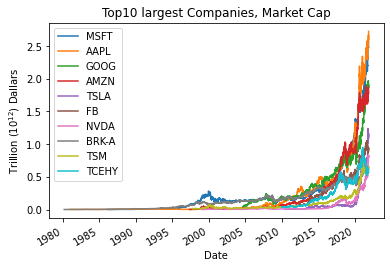

In [31]:
Y= X.Close.loc[:,top10L]*top10Stocks
Y.plot(#logy=True, 
       title= 'Top10 largest Companies, Market Cap',
       ylabel= 'Trillion ($10^{12}$) Dallars')

array([[<AxesSubplot:title={'center':'MSFT'}>,
        <AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'GOOG'}>],
       [<AxesSubplot:title={'center':'AMZN'}>,
        <AxesSubplot:title={'center':'TSLA'}>,
        <AxesSubplot:title={'center':'FB'}>],
       [<AxesSubplot:title={'center':'NVDA'}>,
        <AxesSubplot:title={'center':'BRK-A'}>,
        <AxesSubplot:title={'center':'TSM'}>],
       [<AxesSubplot:title={'center':'TCEHY'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

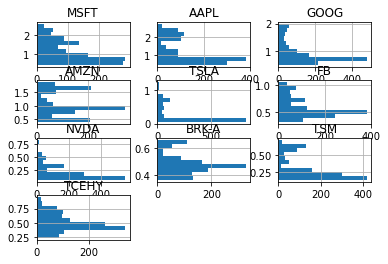

In [32]:
Y.loc['2017-01-01':].hist(orientation='horizontal')